# __Test file__

Notebook intended to test the ```MultilinearRegression()``` class implemented in ```multilinear.py``` file in this same location.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import pandas as pd
from sklearn.model_selection import train_test_split
from multilinear import *

# No warnings
import warnings
warnings.filterwarnings('ignore')

#get training data
data = ascii.read('data/table1.dat', readme='data/ReadMe')
df = data.to_pandas()

sigma0 = 200.
df['logsigma*'] = np.log10(df['sigma*']/sigma0)
df['logFWHM'] = np.log10(df['FWHM'])
newdf = df[['logM','logsigma*','logFWHM']]
newdf = newdf.apply(pd.to_numeric, errors='coerce')
newdf = newdf.dropna()
# newdf.describe()

Xdf = np.asarray(newdf[['logsigma*','logFWHM']])
ydf = np.asarray(newdf[['logM']])

print('Xdf shape : ', Xdf.shape)
print('ydf shape : ', ydf.shape)

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=60, test_size=0.15)

X_train.shape , y_train.shape, X_test.shape , y_test.shape

#checking the behavior of the np.dot() method, in order to determine the shape that w and X must have
# ===========================================================================================================================
np.random.seed(4)
W = np.random.rand(X_train.shape[1],1)
print('W shape :', W.shape) #<---- from this and Xdf.shape, we know that numpy.dot() works as usual matricial product A_mn*B_nm' 
# print(X_train)
# print(np.dot(X_train, W))


Xdf shape :  (71, 2)
ydf shape :  (71, 1)
W shape : (2, 1)


In [41]:
# '''checking the behavior of the numpy.dot method'''
array1 = np.array([[1,2,3], 
          [1,2,3],
          [1,1,1],
          [2,1,1]])
array2 = np.array([1,2,3])

dot = np.dot(array1,array2)
dot0 = np.dot(array1[3],array2)

print(array1.shape)
print(array2.shape)
print(dot)
print(dot0)

(4, 3)
(3,)
[14 14  6  7]
7


In [5]:
X_train = np.asarray(newdf[['logFWHM']])
y_train = np.asarray(newdf[['logM']])

lr = MultilinearRegression()
# m = X_train.shape[1]
# np.random.seed(413)
# W = np.random.rand(m,1)
# b = np.random.rand()
# lr.grad(X_train,y_train,W,b)
# lr.optimizer(X_train, y_train, W, b)
lr.fit(X_train, y_train)
W, b = lr.W, lr.b

print('\nThe optimized parameters are')
print('W = ', W)
print('b = ', b)

Initial cost : 17.69021551098322
Final cost : 0.06574266259300507
Number of epochs : 500000

The optimized parameters are
W =  [[2.46402136]]
b =  -1.6588695617709774


In [3]:
lr.score(X_test, y_test) #in this version, this part is not working, since X_test and y_test are not defined

ValueError: shapes (11,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)

In [4]:
lr.score(X_train, y_train)

0.8472284844250572

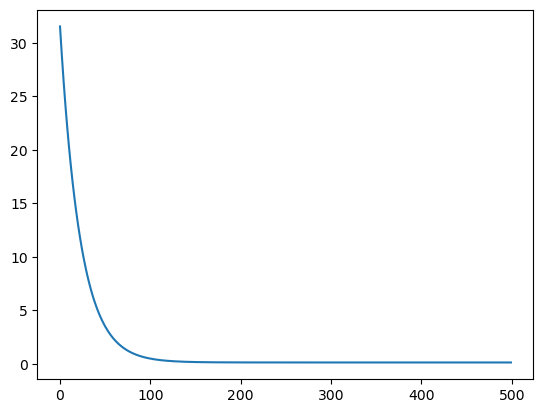

In [5]:
# print(len(lr.history))
plt.plot(np.arange(0, len(lr.history[:500])), lr.history[:500])